In [42]:
import ReservoirComputer_3 as ReCom
import numpy as np
import scipy.sparse as sp
import ReservoirPlot as resplt
import ReservoirAnalysis as resan
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import ipywidgets as widgets

In [1]:
def lorenz(u, *args):
    x, y, z = u[0], u[1], u[2]
    beta, rho, sigma = alpha[0], alpha[1], alpha[2]
    
    return np.asarray([sigma*(y - x), x*(rho - z) - y, x*y - beta*z])


def RK4_step(x, dt, f, args):
    k_1 = f(x, args)
    k_2 = f(x + dt*k_1/2, args)
    k_3 = f(x + dt*k_2/2, args)
    k_4 = f(x + dt*k_3, args)
    return 1/6*dt*(k_1 + 2*k_2 + 2*k_3 + k_4)


def tpe(u_hat, dt, f, args):
    # Calculate approx. and ideal movement vectors.
    delta_hat = np.diff(u_hat, axis=0)
    delta = np.asarray([RK4_step(u_hat[i], dt, f, args) for i in range(u_hat.shape[0] - 1)])
    
    # Calculate norms of ideal movement vectors approx. movement vector error.
    delta_norm = np.linalg.norm(delta, axis=1)
    error_norm = np.linalg.norm(delta_hat - delta, axis=1)
    
    # Return TPE.
    return 1/(dt*u_hat.shape[0])*np.sum(np.multiply(error_norm, 1/delta_norm))

In [44]:
T_train = 100
T_predict = 150
dt = 0.01
alpha = (8.0/3.0, 28.0, 10.0)
x0 = np.asarray([1.0, 1.0, 1.0])
t_points_training = np.linspace(0, T_train, int(T_train/dt))
t_points_prediction = np.linspace(0, T_predict, int(T_predict/dt))
train_data = integrate.odeint(lorenz, x0, t_points_training, args=alpha)
val_data = integrate.odeint(lorenz, train_data[-1], t_points_prediction, args=alpha)

In [45]:
RC1 = ReCom.ESN(N=100, p=0.01, d=3, rho=0.9, sigma=0.014, gamma=10.0, beta=1e-6)
RC2 = ReCom.ESN(N=100, p=0.01, d=3, rho=0.01, sigma=0.014, gamma=10.0, beta=1e-6)
RC3 = ReCom.ESN(N=100, p=0.01, d=3, rho=0.014, sigma=0.0145, gamma=10.0, beta=1e-6)

training_traj = RC1.train(train_data, t_points_training, t_listen=5000)
prediction_1 = RC1.predict(t_points_prediction)

training_traj = RC2.train(train_data, t_points_training, t_listen=5000)
prediction_2 = RC2.predict(t_points_prediction)

training_traj = RC3.train(train_data, t_points_training, t_listen=5000)
prediction_3 = RC3.predict(t_points_prediction)

In [46]:
TPE_lorenz1 = TPE(prediction_1, dt, f=lorenz, args=alpha)
TPE_lorenz2 = TPE(prediction_2, dt, f=lorenz, args=alpha)
TPE_lorenz3 = TPE(prediction_3, dt, f=lorenz, args=alpha)

In [47]:
TPE_lorenz1, TPE_lorenz2, TPE_lorenz3

(0.18440792751677398, 84.4440932640116, 48.969921431753384)

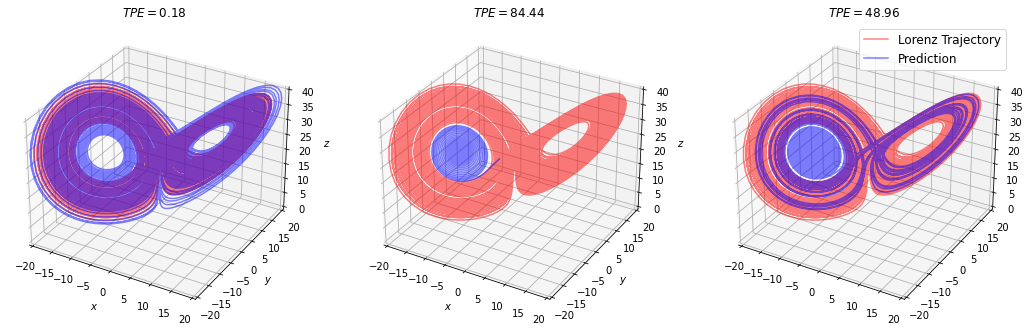

In [65]:
%matplotlib inline
fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(val_data[:-1,0], val_data[:-1,1], val_data[:-1,2], 'r-', markersize=1.0, alpha=0.5, label='Lorenz Trajectory')
ax1.plot(prediction_1[:-1,0], prediction_1[:-1,1], prediction_1[:-1,2], 'b-', markersize=1.0, alpha=0.5, label='Prediction 1')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(val_data[:-1,0], val_data[:-1,1], val_data[:-1,2], 'r-', markersize=1.0, alpha=0.5, label='Lorenz Trajectory')
ax2.plot(prediction_2[:-1,0], prediction_2[:-1,1], prediction_2[:-1,2], 'b-', markersize=1.0, alpha=0.5, label='Prediction 2')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(val_data[:-1,0], val_data[:-1,1], val_data[:-1,2], 'r-', markersize=1.0, alpha=0.5, label='Lorenz Trajectory')
ax3.plot(prediction_3[:-1,0], prediction_3[:-1,1], prediction_3[:-1,2], 'b-', markersize=1.0, alpha=0.5, label='Prediction')

xlim, ylim, zlim = 20, 20, 40
ax1.set_xlim(-xlim, xlim)
ax1.set_ylim(-ylim, ylim)
ax1.set_zlim(0, zlim)
ax1.set_title('$TPE = 0.18$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax2.set_xlim(-xlim, xlim)
ax2.set_ylim(-ylim, ylim)
ax2.set_zlim(0, zlim)
ax2.set_title('$TPE = 84.44$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')

ax3.set_xlim(-xlim, xlim)
ax3.set_ylim(-ylim, ylim)
ax3.set_zlim(0, zlim)
ax3.set_title('$TPE = 48.96$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')

ax3.legend(prop={'size': 12})

In [16]:
T_train = 100
T_predict = 150
dt = 0.01
alpha = (8.0/3.0, 28.0, 10.0)
x0 = np.asarray([1.0, 1.0, 1.0])
t_points_training = np.linspace(0, T_train, int(T_train/dt))
t_points_prediction = np.linspace(0, T_predict, int(T_predict/dt))
train_data = integrate.odeint(lorenz, x0, t_points_training, args=alpha)
val_data = integrate.odeint(lorenz, train_data[-1], t_points_prediction, args=alpha)

In [17]:
# 1.0/0.01 x 1.0/0.01 = 10,000 orbits.
rho_space = np.arange(0, 1.0, 0.01)
sigma_space = np.arange(0, 1.0, 0.01)

In [117]:
%%time
predicted_orbits  = resan.rho_sigma_orbits(rho_space, 
                                    sigma_space,
                                    train_data, 
                                    t_points_training, 
                                    t_points_prediction,
                                    5000,
                                    RC,
                                    hebb=False)

(0.0, 0.0)
(0.01, 0.0)
(0.02, 0.0)
(0.03, 0.0)
(0.04, 0.0)
(0.05, 0.0)
(0.06, 0.0)
(0.07, 0.0)
(0.08, 0.0)
(0.09, 0.0)
(0.1, 0.0)
(0.11, 0.0)
(0.12, 0.0)
(0.13, 0.0)
(0.14, 0.0)
(0.15, 0.0)
(0.16, 0.0)
(0.17, 0.0)
(0.18, 0.0)
(0.19, 0.0)
(0.2, 0.0)
(0.21, 0.0)
(0.22, 0.0)
(0.23, 0.0)
(0.24, 0.0)
(0.25, 0.0)
(0.26, 0.0)
(0.27, 0.0)
(0.28, 0.0)
(0.29, 0.0)
(0.3, 0.0)
(0.31, 0.0)
(0.32, 0.0)
(0.33, 0.0)
(0.34, 0.0)
(0.35000000000000003, 0.0)
(0.36, 0.0)
(0.37, 0.0)
(0.38, 0.0)
(0.39, 0.0)
(0.4, 0.0)
(0.41000000000000003, 0.0)
(0.42, 0.0)
(0.43, 0.0)
(0.44, 0.0)
(0.45, 0.0)
(0.46, 0.0)
(0.47000000000000003, 0.0)
(0.48, 0.0)
(0.49, 0.0)
(0.5, 0.0)
(0.51, 0.0)
(0.52, 0.0)
(0.53, 0.0)
(0.54, 0.0)
(0.55, 0.0)
(0.56, 0.0)
(0.5700000000000001, 0.0)
(0.58, 0.0)
(0.59, 0.0)
(0.6, 0.0)
(0.61, 0.0)
(0.62, 0.0)
(0.63, 0.0)
(0.64, 0.0)
(0.65, 0.0)
(0.66, 0.0)
(0.67, 0.0)
(0.68, 0.0)
(0.6900000000000001, 0.0)
(0.7000000000000001, 0.0)
(0.71, 0.0)
(0.72, 0.0)
(0.73, 0.0)
(0.74, 0.0)
(0.75, 0.0)
(0.76, 0

(0.81, 0.05)
(0.8200000000000001, 0.05)
(0.8300000000000001, 0.05)
(0.84, 0.05)
(0.85, 0.05)
(0.86, 0.05)
(0.87, 0.05)
(0.88, 0.05)
(0.89, 0.05)
(0.9, 0.05)
(0.91, 0.05)
(0.92, 0.05)
(0.93, 0.05)
(0.9400000000000001, 0.05)
(0.9500000000000001, 0.05)
(0.96, 0.05)
(0.97, 0.05)
(0.98, 0.05)
(0.99, 0.05)
(0.0, 0.06)
(0.01, 0.06)
(0.02, 0.06)
(0.03, 0.06)
(0.04, 0.06)
(0.05, 0.06)
(0.06, 0.06)
(0.07, 0.06)
(0.08, 0.06)
(0.09, 0.06)
(0.1, 0.06)
(0.11, 0.06)
(0.12, 0.06)
(0.13, 0.06)
(0.14, 0.06)
(0.15, 0.06)
(0.16, 0.06)
(0.17, 0.06)
(0.18, 0.06)
(0.19, 0.06)
(0.2, 0.06)
(0.21, 0.06)
(0.22, 0.06)
(0.23, 0.06)
(0.24, 0.06)
(0.25, 0.06)
(0.26, 0.06)
(0.27, 0.06)
(0.28, 0.06)
(0.29, 0.06)
(0.3, 0.06)
(0.31, 0.06)
(0.32, 0.06)
(0.33, 0.06)
(0.34, 0.06)
(0.35000000000000003, 0.06)
(0.36, 0.06)
(0.37, 0.06)
(0.38, 0.06)
(0.39, 0.06)
(0.4, 0.06)
(0.41000000000000003, 0.06)
(0.42, 0.06)
(0.43, 0.06)
(0.44, 0.06)
(0.45, 0.06)
(0.46, 0.06)
(0.47000000000000003, 0.06)
(0.48, 0.06)
(0.49, 0.06)
(0.5, 0.

(0.6, 0.11)
(0.61, 0.11)
(0.62, 0.11)
(0.63, 0.11)
(0.64, 0.11)
(0.65, 0.11)
(0.66, 0.11)
(0.67, 0.11)
(0.68, 0.11)
(0.6900000000000001, 0.11)
(0.7000000000000001, 0.11)
(0.71, 0.11)
(0.72, 0.11)
(0.73, 0.11)
(0.74, 0.11)
(0.75, 0.11)
(0.76, 0.11)
(0.77, 0.11)
(0.78, 0.11)
(0.79, 0.11)
(0.8, 0.11)
(0.81, 0.11)
(0.8200000000000001, 0.11)
(0.8300000000000001, 0.11)
(0.84, 0.11)
(0.85, 0.11)
(0.86, 0.11)
(0.87, 0.11)
(0.88, 0.11)
(0.89, 0.11)
(0.9, 0.11)
(0.91, 0.11)
(0.92, 0.11)
(0.93, 0.11)
(0.9400000000000001, 0.11)
(0.9500000000000001, 0.11)
(0.96, 0.11)
(0.97, 0.11)
(0.98, 0.11)
(0.99, 0.11)
(0.0, 0.12)
(0.01, 0.12)
(0.02, 0.12)
(0.03, 0.12)
(0.04, 0.12)
(0.05, 0.12)
(0.06, 0.12)
(0.07, 0.12)
(0.08, 0.12)
(0.09, 0.12)
(0.1, 0.12)
(0.11, 0.12)
(0.12, 0.12)
(0.13, 0.12)
(0.14, 0.12)
(0.15, 0.12)
(0.16, 0.12)
(0.17, 0.12)
(0.18, 0.12)
(0.19, 0.12)
(0.2, 0.12)
(0.21, 0.12)
(0.22, 0.12)
(0.23, 0.12)
(0.24, 0.12)
(0.25, 0.12)
(0.26, 0.12)
(0.27, 0.12)
(0.28, 0.12)
(0.29, 0.12)
(0.3, 0.12)


(0.33, 0.17)
(0.34, 0.17)
(0.35000000000000003, 0.17)
(0.36, 0.17)
(0.37, 0.17)
(0.38, 0.17)
(0.39, 0.17)
(0.4, 0.17)
(0.41000000000000003, 0.17)
(0.42, 0.17)
(0.43, 0.17)
(0.44, 0.17)
(0.45, 0.17)
(0.46, 0.17)
(0.47000000000000003, 0.17)
(0.48, 0.17)
(0.49, 0.17)
(0.5, 0.17)
(0.51, 0.17)
(0.52, 0.17)
(0.53, 0.17)
(0.54, 0.17)
(0.55, 0.17)
(0.56, 0.17)
(0.5700000000000001, 0.17)
(0.58, 0.17)
(0.59, 0.17)
(0.6, 0.17)
(0.61, 0.17)
(0.62, 0.17)
(0.63, 0.17)
(0.64, 0.17)
(0.65, 0.17)
(0.66, 0.17)
(0.67, 0.17)
(0.68, 0.17)
(0.6900000000000001, 0.17)
(0.7000000000000001, 0.17)
(0.71, 0.17)
(0.72, 0.17)
(0.73, 0.17)
(0.74, 0.17)
(0.75, 0.17)
(0.76, 0.17)
(0.77, 0.17)
(0.78, 0.17)
(0.79, 0.17)
(0.8, 0.17)
(0.81, 0.17)
(0.8200000000000001, 0.17)
(0.8300000000000001, 0.17)
(0.84, 0.17)
(0.85, 0.17)
(0.86, 0.17)
(0.87, 0.17)
(0.88, 0.17)
(0.89, 0.17)
(0.9, 0.17)
(0.91, 0.17)
(0.92, 0.17)
(0.93, 0.17)
(0.9400000000000001, 0.17)
(0.9500000000000001, 0.17)
(0.96, 0.17)
(0.97, 0.17)
(0.98, 0.17)
(0.9

(0.09, 0.23)
(0.1, 0.23)
(0.11, 0.23)
(0.12, 0.23)
(0.13, 0.23)
(0.14, 0.23)
(0.15, 0.23)
(0.16, 0.23)
(0.17, 0.23)
(0.18, 0.23)
(0.19, 0.23)
(0.2, 0.23)
(0.21, 0.23)
(0.22, 0.23)
(0.23, 0.23)
(0.24, 0.23)
(0.25, 0.23)
(0.26, 0.23)
(0.27, 0.23)
(0.28, 0.23)
(0.29, 0.23)
(0.3, 0.23)
(0.31, 0.23)
(0.32, 0.23)
(0.33, 0.23)
(0.34, 0.23)
(0.35000000000000003, 0.23)
(0.36, 0.23)
(0.37, 0.23)
(0.38, 0.23)
(0.39, 0.23)
(0.4, 0.23)
(0.41000000000000003, 0.23)
(0.42, 0.23)
(0.43, 0.23)
(0.44, 0.23)
(0.45, 0.23)
(0.46, 0.23)
(0.47000000000000003, 0.23)
(0.48, 0.23)
(0.49, 0.23)
(0.5, 0.23)
(0.51, 0.23)
(0.52, 0.23)
(0.53, 0.23)
(0.54, 0.23)
(0.55, 0.23)
(0.56, 0.23)
(0.5700000000000001, 0.23)
(0.58, 0.23)
(0.59, 0.23)
(0.6, 0.23)
(0.61, 0.23)
(0.62, 0.23)
(0.63, 0.23)
(0.64, 0.23)
(0.65, 0.23)
(0.66, 0.23)
(0.67, 0.23)
(0.68, 0.23)
(0.6900000000000001, 0.23)
(0.7000000000000001, 0.23)
(0.71, 0.23)
(0.72, 0.23)
(0.73, 0.23)
(0.74, 0.23)
(0.75, 0.23)
(0.76, 0.23)
(0.77, 0.23)
(0.78, 0.23)
(0.79, 0.

(0.8200000000000001, 0.28)
(0.8300000000000001, 0.28)
(0.84, 0.28)
(0.85, 0.28)
(0.86, 0.28)
(0.87, 0.28)
(0.88, 0.28)
(0.89, 0.28)
(0.9, 0.28)
(0.91, 0.28)
(0.92, 0.28)
(0.93, 0.28)
(0.9400000000000001, 0.28)
(0.9500000000000001, 0.28)
(0.96, 0.28)
(0.97, 0.28)
(0.98, 0.28)
(0.99, 0.28)
(0.0, 0.29)
(0.01, 0.29)
(0.02, 0.29)
(0.03, 0.29)
(0.04, 0.29)
(0.05, 0.29)
(0.06, 0.29)
(0.07, 0.29)
(0.08, 0.29)
(0.09, 0.29)
(0.1, 0.29)
(0.11, 0.29)
(0.12, 0.29)
(0.13, 0.29)
(0.14, 0.29)
(0.15, 0.29)
(0.16, 0.29)
(0.17, 0.29)
(0.18, 0.29)
(0.19, 0.29)
(0.2, 0.29)
(0.21, 0.29)
(0.22, 0.29)
(0.23, 0.29)
(0.24, 0.29)
(0.25, 0.29)
(0.26, 0.29)
(0.27, 0.29)
(0.28, 0.29)
(0.29, 0.29)
(0.3, 0.29)
(0.31, 0.29)
(0.32, 0.29)
(0.33, 0.29)
(0.34, 0.29)
(0.35000000000000003, 0.29)
(0.36, 0.29)
(0.37, 0.29)
(0.38, 0.29)
(0.39, 0.29)
(0.4, 0.29)
(0.41000000000000003, 0.29)
(0.42, 0.29)
(0.43, 0.29)
(0.44, 0.29)
(0.45, 0.29)
(0.46, 0.29)
(0.47000000000000003, 0.29)
(0.48, 0.29)
(0.49, 0.29)
(0.5, 0.29)
(0.51, 0.

(0.61, 0.34)
(0.62, 0.34)
(0.63, 0.34)
(0.64, 0.34)
(0.65, 0.34)
(0.66, 0.34)
(0.67, 0.34)
(0.68, 0.34)
(0.6900000000000001, 0.34)
(0.7000000000000001, 0.34)
(0.71, 0.34)
(0.72, 0.34)
(0.73, 0.34)
(0.74, 0.34)
(0.75, 0.34)
(0.76, 0.34)
(0.77, 0.34)
(0.78, 0.34)
(0.79, 0.34)
(0.8, 0.34)
(0.81, 0.34)
(0.8200000000000001, 0.34)
(0.8300000000000001, 0.34)
(0.84, 0.34)
(0.85, 0.34)
(0.86, 0.34)
(0.87, 0.34)
(0.88, 0.34)
(0.89, 0.34)
(0.9, 0.34)
(0.91, 0.34)
(0.92, 0.34)
(0.93, 0.34)
(0.9400000000000001, 0.34)
(0.9500000000000001, 0.34)
(0.96, 0.34)
(0.97, 0.34)
(0.98, 0.34)
(0.99, 0.34)
(0.0, 0.35000000000000003)
(0.01, 0.35000000000000003)
(0.02, 0.35000000000000003)
(0.03, 0.35000000000000003)
(0.04, 0.35000000000000003)
(0.05, 0.35000000000000003)
(0.06, 0.35000000000000003)
(0.07, 0.35000000000000003)
(0.08, 0.35000000000000003)
(0.09, 0.35000000000000003)
(0.1, 0.35000000000000003)
(0.11, 0.35000000000000003)
(0.12, 0.35000000000000003)
(0.13, 0.35000000000000003)
(0.14, 0.350000000000

(0.29, 0.39)
(0.3, 0.39)
(0.31, 0.39)
(0.32, 0.39)
(0.33, 0.39)
(0.34, 0.39)
(0.35000000000000003, 0.39)
(0.36, 0.39)
(0.37, 0.39)
(0.38, 0.39)
(0.39, 0.39)
(0.4, 0.39)
(0.41000000000000003, 0.39)
(0.42, 0.39)
(0.43, 0.39)
(0.44, 0.39)
(0.45, 0.39)
(0.46, 0.39)
(0.47000000000000003, 0.39)
(0.48, 0.39)
(0.49, 0.39)
(0.5, 0.39)
(0.51, 0.39)
(0.52, 0.39)
(0.53, 0.39)
(0.54, 0.39)
(0.55, 0.39)
(0.56, 0.39)
(0.5700000000000001, 0.39)
(0.58, 0.39)
(0.59, 0.39)
(0.6, 0.39)
(0.61, 0.39)
(0.62, 0.39)
(0.63, 0.39)
(0.64, 0.39)
(0.65, 0.39)
(0.66, 0.39)
(0.67, 0.39)
(0.68, 0.39)
(0.6900000000000001, 0.39)
(0.7000000000000001, 0.39)
(0.71, 0.39)
(0.72, 0.39)
(0.73, 0.39)
(0.74, 0.39)
(0.75, 0.39)
(0.76, 0.39)
(0.77, 0.39)
(0.78, 0.39)
(0.79, 0.39)
(0.8, 0.39)
(0.81, 0.39)
(0.8200000000000001, 0.39)
(0.8300000000000001, 0.39)
(0.84, 0.39)
(0.85, 0.39)
(0.86, 0.39)
(0.87, 0.39)
(0.88, 0.39)
(0.89, 0.39)
(0.9, 0.39)
(0.91, 0.39)
(0.92, 0.39)
(0.93, 0.39)
(0.9400000000000001, 0.39)
(0.9500000000000001

(0.0, 0.44)
(0.01, 0.44)
(0.02, 0.44)
(0.03, 0.44)
(0.04, 0.44)
(0.05, 0.44)
(0.06, 0.44)
(0.07, 0.44)
(0.08, 0.44)
(0.09, 0.44)
(0.1, 0.44)
(0.11, 0.44)
(0.12, 0.44)
(0.13, 0.44)
(0.14, 0.44)
(0.15, 0.44)
(0.16, 0.44)
(0.17, 0.44)
(0.18, 0.44)
(0.19, 0.44)
(0.2, 0.44)
(0.21, 0.44)
(0.22, 0.44)
(0.23, 0.44)
(0.24, 0.44)
(0.25, 0.44)
(0.26, 0.44)
(0.27, 0.44)
(0.28, 0.44)
(0.29, 0.44)
(0.3, 0.44)
(0.31, 0.44)
(0.32, 0.44)
(0.33, 0.44)
(0.34, 0.44)
(0.35000000000000003, 0.44)
(0.36, 0.44)
(0.37, 0.44)
(0.38, 0.44)
(0.39, 0.44)
(0.4, 0.44)
(0.41000000000000003, 0.44)
(0.42, 0.44)
(0.43, 0.44)
(0.44, 0.44)
(0.45, 0.44)
(0.46, 0.44)
(0.47000000000000003, 0.44)
(0.48, 0.44)
(0.49, 0.44)
(0.5, 0.44)
(0.51, 0.44)
(0.52, 0.44)
(0.53, 0.44)
(0.54, 0.44)
(0.55, 0.44)
(0.56, 0.44)
(0.5700000000000001, 0.44)
(0.58, 0.44)
(0.59, 0.44)
(0.6, 0.44)
(0.61, 0.44)
(0.62, 0.44)
(0.63, 0.44)
(0.64, 0.44)
(0.65, 0.44)
(0.66, 0.44)
(0.67, 0.44)
(0.68, 0.44)
(0.6900000000000001, 0.44)
(0.7000000000000001, 0.4

(0.7000000000000001, 0.48)
(0.71, 0.48)
(0.72, 0.48)
(0.73, 0.48)
(0.74, 0.48)
(0.75, 0.48)
(0.76, 0.48)
(0.77, 0.48)
(0.78, 0.48)
(0.79, 0.48)
(0.8, 0.48)
(0.81, 0.48)
(0.8200000000000001, 0.48)
(0.8300000000000001, 0.48)
(0.84, 0.48)
(0.85, 0.48)
(0.86, 0.48)
(0.87, 0.48)
(0.88, 0.48)
(0.89, 0.48)
(0.9, 0.48)
(0.91, 0.48)
(0.92, 0.48)
(0.93, 0.48)
(0.9400000000000001, 0.48)
(0.9500000000000001, 0.48)
(0.96, 0.48)
(0.97, 0.48)
(0.98, 0.48)
(0.99, 0.48)
(0.0, 0.49)
(0.01, 0.49)
(0.02, 0.49)
(0.03, 0.49)
(0.04, 0.49)
(0.05, 0.49)
(0.06, 0.49)
(0.07, 0.49)
(0.08, 0.49)
(0.09, 0.49)
(0.1, 0.49)
(0.11, 0.49)
(0.12, 0.49)
(0.13, 0.49)
(0.14, 0.49)
(0.15, 0.49)
(0.16, 0.49)
(0.17, 0.49)
(0.18, 0.49)
(0.19, 0.49)
(0.2, 0.49)
(0.21, 0.49)
(0.22, 0.49)
(0.23, 0.49)
(0.24, 0.49)
(0.25, 0.49)
(0.26, 0.49)
(0.27, 0.49)
(0.28, 0.49)
(0.29, 0.49)
(0.3, 0.49)
(0.31, 0.49)
(0.32, 0.49)
(0.33, 0.49)
(0.34, 0.49)
(0.35000000000000003, 0.49)
(0.36, 0.49)
(0.37, 0.49)
(0.38, 0.49)
(0.39, 0.49)
(0.4, 0.49)

(0.49, 0.54)
(0.5, 0.54)
(0.51, 0.54)
(0.52, 0.54)
(0.53, 0.54)
(0.54, 0.54)
(0.55, 0.54)
(0.56, 0.54)
(0.5700000000000001, 0.54)
(0.58, 0.54)
(0.59, 0.54)
(0.6, 0.54)
(0.61, 0.54)
(0.62, 0.54)
(0.63, 0.54)
(0.64, 0.54)
(0.65, 0.54)
(0.66, 0.54)
(0.67, 0.54)
(0.68, 0.54)
(0.6900000000000001, 0.54)
(0.7000000000000001, 0.54)
(0.71, 0.54)
(0.72, 0.54)
(0.73, 0.54)
(0.74, 0.54)
(0.75, 0.54)
(0.76, 0.54)
(0.77, 0.54)
(0.78, 0.54)
(0.79, 0.54)
(0.8, 0.54)
(0.81, 0.54)
(0.8200000000000001, 0.54)
(0.8300000000000001, 0.54)
(0.84, 0.54)
(0.85, 0.54)
(0.86, 0.54)
(0.87, 0.54)
(0.88, 0.54)
(0.89, 0.54)
(0.9, 0.54)
(0.91, 0.54)
(0.92, 0.54)
(0.93, 0.54)
(0.9400000000000001, 0.54)
(0.9500000000000001, 0.54)
(0.96, 0.54)
(0.97, 0.54)
(0.98, 0.54)
(0.99, 0.54)
(0.0, 0.55)
(0.01, 0.55)
(0.02, 0.55)
(0.03, 0.55)
(0.04, 0.55)
(0.05, 0.55)
(0.06, 0.55)
(0.07, 0.55)
(0.08, 0.55)
(0.09, 0.55)
(0.1, 0.55)
(0.11, 0.55)
(0.12, 0.55)
(0.13, 0.55)
(0.14, 0.55)
(0.15, 0.55)
(0.16, 0.55)
(0.17, 0.55)
(0.18, 0.55

(0.24, 0.59)
(0.25, 0.59)
(0.26, 0.59)
(0.27, 0.59)
(0.28, 0.59)
(0.29, 0.59)
(0.3, 0.59)
(0.31, 0.59)
(0.32, 0.59)
(0.33, 0.59)
(0.34, 0.59)
(0.35000000000000003, 0.59)
(0.36, 0.59)
(0.37, 0.59)
(0.38, 0.59)
(0.39, 0.59)
(0.4, 0.59)
(0.41000000000000003, 0.59)
(0.42, 0.59)
(0.43, 0.59)
(0.44, 0.59)
(0.45, 0.59)
(0.46, 0.59)
(0.47000000000000003, 0.59)
(0.48, 0.59)
(0.49, 0.59)
(0.5, 0.59)
(0.51, 0.59)
(0.52, 0.59)
(0.53, 0.59)
(0.54, 0.59)
(0.55, 0.59)
(0.56, 0.59)
(0.5700000000000001, 0.59)
(0.58, 0.59)
(0.59, 0.59)
(0.6, 0.59)
(0.61, 0.59)
(0.62, 0.59)
(0.63, 0.59)
(0.64, 0.59)
(0.65, 0.59)
(0.66, 0.59)
(0.67, 0.59)
(0.68, 0.59)
(0.6900000000000001, 0.59)
(0.7000000000000001, 0.59)
(0.71, 0.59)
(0.72, 0.59)
(0.73, 0.59)
(0.74, 0.59)
(0.75, 0.59)
(0.76, 0.59)
(0.77, 0.59)
(0.78, 0.59)
(0.79, 0.59)
(0.8, 0.59)
(0.81, 0.59)
(0.8200000000000001, 0.59)
(0.8300000000000001, 0.59)
(0.84, 0.59)
(0.85, 0.59)
(0.86, 0.59)
(0.87, 0.59)
(0.88, 0.59)
(0.89, 0.59)
(0.9, 0.59)
(0.91, 0.59)
(0.92, 

(0.0, 0.65)
(0.01, 0.65)
(0.02, 0.65)
(0.03, 0.65)
(0.04, 0.65)
(0.05, 0.65)
(0.06, 0.65)
(0.07, 0.65)
(0.08, 0.65)
(0.09, 0.65)
(0.1, 0.65)
(0.11, 0.65)
(0.12, 0.65)
(0.13, 0.65)
(0.14, 0.65)
(0.15, 0.65)
(0.16, 0.65)
(0.17, 0.65)
(0.18, 0.65)
(0.19, 0.65)
(0.2, 0.65)
(0.21, 0.65)
(0.22, 0.65)
(0.23, 0.65)
(0.24, 0.65)
(0.25, 0.65)
(0.26, 0.65)
(0.27, 0.65)
(0.28, 0.65)
(0.29, 0.65)
(0.3, 0.65)
(0.31, 0.65)
(0.32, 0.65)
(0.33, 0.65)
(0.34, 0.65)
(0.35000000000000003, 0.65)
(0.36, 0.65)
(0.37, 0.65)
(0.38, 0.65)
(0.39, 0.65)
(0.4, 0.65)
(0.41000000000000003, 0.65)
(0.42, 0.65)
(0.43, 0.65)
(0.44, 0.65)
(0.45, 0.65)
(0.46, 0.65)
(0.47000000000000003, 0.65)
(0.48, 0.65)
(0.49, 0.65)
(0.5, 0.65)
(0.51, 0.65)
(0.52, 0.65)
(0.53, 0.65)
(0.54, 0.65)
(0.55, 0.65)
(0.56, 0.65)
(0.5700000000000001, 0.65)
(0.58, 0.65)
(0.59, 0.65)
(0.6, 0.65)
(0.61, 0.65)
(0.62, 0.65)
(0.63, 0.65)
(0.64, 0.65)
(0.65, 0.65)
(0.66, 0.65)
(0.67, 0.65)
(0.68, 0.65)
(0.6900000000000001, 0.65)
(0.7000000000000001, 0.6

(0.88, 0.6900000000000001)
(0.89, 0.6900000000000001)
(0.9, 0.6900000000000001)
(0.91, 0.6900000000000001)
(0.92, 0.6900000000000001)
(0.93, 0.6900000000000001)
(0.9400000000000001, 0.6900000000000001)
(0.9500000000000001, 0.6900000000000001)
(0.96, 0.6900000000000001)
(0.97, 0.6900000000000001)
(0.98, 0.6900000000000001)
(0.99, 0.6900000000000001)
(0.0, 0.7000000000000001)
(0.01, 0.7000000000000001)
(0.02, 0.7000000000000001)
(0.03, 0.7000000000000001)
(0.04, 0.7000000000000001)
(0.05, 0.7000000000000001)
(0.06, 0.7000000000000001)
(0.07, 0.7000000000000001)
(0.08, 0.7000000000000001)
(0.09, 0.7000000000000001)
(0.1, 0.7000000000000001)
(0.11, 0.7000000000000001)
(0.12, 0.7000000000000001)
(0.13, 0.7000000000000001)
(0.14, 0.7000000000000001)
(0.15, 0.7000000000000001)
(0.16, 0.7000000000000001)
(0.17, 0.7000000000000001)
(0.18, 0.7000000000000001)
(0.19, 0.7000000000000001)
(0.2, 0.7000000000000001)
(0.21, 0.7000000000000001)
(0.22, 0.7000000000000001)
(0.23, 0.7000000000000001)
(0.2

(0.52, 0.74)
(0.53, 0.74)
(0.54, 0.74)
(0.55, 0.74)
(0.56, 0.74)
(0.5700000000000001, 0.74)
(0.58, 0.74)
(0.59, 0.74)
(0.6, 0.74)
(0.61, 0.74)
(0.62, 0.74)
(0.63, 0.74)
(0.64, 0.74)
(0.65, 0.74)
(0.66, 0.74)
(0.67, 0.74)
(0.68, 0.74)
(0.6900000000000001, 0.74)
(0.7000000000000001, 0.74)
(0.71, 0.74)
(0.72, 0.74)
(0.73, 0.74)
(0.74, 0.74)
(0.75, 0.74)
(0.76, 0.74)
(0.77, 0.74)
(0.78, 0.74)
(0.79, 0.74)
(0.8, 0.74)
(0.81, 0.74)
(0.8200000000000001, 0.74)
(0.8300000000000001, 0.74)
(0.84, 0.74)
(0.85, 0.74)
(0.86, 0.74)
(0.87, 0.74)
(0.88, 0.74)
(0.89, 0.74)
(0.9, 0.74)
(0.91, 0.74)
(0.92, 0.74)
(0.93, 0.74)
(0.9400000000000001, 0.74)
(0.9500000000000001, 0.74)
(0.96, 0.74)
(0.97, 0.74)
(0.98, 0.74)
(0.99, 0.74)
(0.0, 0.75)
(0.01, 0.75)
(0.02, 0.75)
(0.03, 0.75)
(0.04, 0.75)
(0.05, 0.75)
(0.06, 0.75)
(0.07, 0.75)
(0.08, 0.75)
(0.09, 0.75)
(0.1, 0.75)
(0.11, 0.75)
(0.12, 0.75)
(0.13, 0.75)
(0.14, 0.75)
(0.15, 0.75)
(0.16, 0.75)
(0.17, 0.75)
(0.18, 0.75)
(0.19, 0.75)
(0.2, 0.75)
(0.21, 0.75

(0.26, 0.8)
(0.27, 0.8)
(0.28, 0.8)
(0.29, 0.8)
(0.3, 0.8)
(0.31, 0.8)
(0.32, 0.8)
(0.33, 0.8)
(0.34, 0.8)
(0.35000000000000003, 0.8)
(0.36, 0.8)
(0.37, 0.8)
(0.38, 0.8)
(0.39, 0.8)
(0.4, 0.8)
(0.41000000000000003, 0.8)
(0.42, 0.8)
(0.43, 0.8)
(0.44, 0.8)
(0.45, 0.8)
(0.46, 0.8)
(0.47000000000000003, 0.8)
(0.48, 0.8)
(0.49, 0.8)
(0.5, 0.8)
(0.51, 0.8)
(0.52, 0.8)
(0.53, 0.8)
(0.54, 0.8)
(0.55, 0.8)
(0.56, 0.8)
(0.5700000000000001, 0.8)
(0.58, 0.8)
(0.59, 0.8)
(0.6, 0.8)
(0.61, 0.8)
(0.62, 0.8)
(0.63, 0.8)
(0.64, 0.8)
(0.65, 0.8)
(0.66, 0.8)
(0.67, 0.8)
(0.68, 0.8)
(0.6900000000000001, 0.8)
(0.7000000000000001, 0.8)
(0.71, 0.8)
(0.72, 0.8)
(0.73, 0.8)
(0.74, 0.8)
(0.75, 0.8)
(0.76, 0.8)
(0.77, 0.8)
(0.78, 0.8)
(0.79, 0.8)
(0.8, 0.8)
(0.81, 0.8)
(0.8200000000000001, 0.8)
(0.8300000000000001, 0.8)
(0.84, 0.8)
(0.85, 0.8)
(0.86, 0.8)
(0.87, 0.8)
(0.88, 0.8)
(0.89, 0.8)
(0.9, 0.8)
(0.91, 0.8)
(0.92, 0.8)
(0.93, 0.8)
(0.9400000000000001, 0.8)
(0.9500000000000001, 0.8)
(0.96, 0.8)
(0.97, 0.8)

(0.06, 0.84)
(0.07, 0.84)
(0.08, 0.84)
(0.09, 0.84)
(0.1, 0.84)
(0.11, 0.84)
(0.12, 0.84)
(0.13, 0.84)
(0.14, 0.84)
(0.15, 0.84)
(0.16, 0.84)
(0.17, 0.84)
(0.18, 0.84)
(0.19, 0.84)
(0.2, 0.84)
(0.21, 0.84)
(0.22, 0.84)
(0.23, 0.84)
(0.24, 0.84)
(0.25, 0.84)
(0.26, 0.84)
(0.27, 0.84)
(0.28, 0.84)
(0.29, 0.84)
(0.3, 0.84)
(0.31, 0.84)
(0.32, 0.84)
(0.33, 0.84)
(0.34, 0.84)
(0.35000000000000003, 0.84)
(0.36, 0.84)
(0.37, 0.84)
(0.38, 0.84)
(0.39, 0.84)
(0.4, 0.84)
(0.41000000000000003, 0.84)
(0.42, 0.84)
(0.43, 0.84)
(0.44, 0.84)
(0.45, 0.84)
(0.46, 0.84)
(0.47000000000000003, 0.84)
(0.48, 0.84)
(0.49, 0.84)
(0.5, 0.84)
(0.51, 0.84)
(0.52, 0.84)
(0.53, 0.84)
(0.54, 0.84)
(0.55, 0.84)
(0.56, 0.84)
(0.5700000000000001, 0.84)
(0.58, 0.84)
(0.59, 0.84)
(0.6, 0.84)
(0.61, 0.84)
(0.62, 0.84)
(0.63, 0.84)
(0.64, 0.84)
(0.65, 0.84)
(0.66, 0.84)
(0.67, 0.84)
(0.68, 0.84)
(0.6900000000000001, 0.84)
(0.7000000000000001, 0.84)
(0.71, 0.84)
(0.72, 0.84)
(0.73, 0.84)
(0.74, 0.84)
(0.75, 0.84)
(0.76, 0.

(0.79, 0.89)
(0.8, 0.89)
(0.81, 0.89)
(0.8200000000000001, 0.89)
(0.8300000000000001, 0.89)
(0.84, 0.89)
(0.85, 0.89)
(0.86, 0.89)
(0.87, 0.89)
(0.88, 0.89)
(0.89, 0.89)
(0.9, 0.89)
(0.91, 0.89)
(0.92, 0.89)
(0.93, 0.89)
(0.9400000000000001, 0.89)
(0.9500000000000001, 0.89)
(0.96, 0.89)
(0.97, 0.89)
(0.98, 0.89)
(0.99, 0.89)
(0.0, 0.9)
(0.01, 0.9)
(0.02, 0.9)
(0.03, 0.9)
(0.04, 0.9)
(0.05, 0.9)
(0.06, 0.9)
(0.07, 0.9)
(0.08, 0.9)
(0.09, 0.9)
(0.1, 0.9)
(0.11, 0.9)
(0.12, 0.9)
(0.13, 0.9)
(0.14, 0.9)
(0.15, 0.9)
(0.16, 0.9)
(0.17, 0.9)
(0.18, 0.9)
(0.19, 0.9)
(0.2, 0.9)
(0.21, 0.9)
(0.22, 0.9)
(0.23, 0.9)
(0.24, 0.9)
(0.25, 0.9)
(0.26, 0.9)
(0.27, 0.9)
(0.28, 0.9)
(0.29, 0.9)
(0.3, 0.9)
(0.31, 0.9)
(0.32, 0.9)
(0.33, 0.9)
(0.34, 0.9)
(0.35000000000000003, 0.9)
(0.36, 0.9)
(0.37, 0.9)
(0.38, 0.9)
(0.39, 0.9)
(0.4, 0.9)
(0.41000000000000003, 0.9)
(0.42, 0.9)
(0.43, 0.9)
(0.44, 0.9)
(0.45, 0.9)
(0.46, 0.9)
(0.47000000000000003, 0.9)
(0.48, 0.9)
(0.49, 0.9)
(0.5, 0.9)
(0.51, 0.9)
(0.52, 0.9

(0.8, 0.9400000000000001)
(0.81, 0.9400000000000001)
(0.8200000000000001, 0.9400000000000001)
(0.8300000000000001, 0.9400000000000001)
(0.84, 0.9400000000000001)
(0.85, 0.9400000000000001)
(0.86, 0.9400000000000001)
(0.87, 0.9400000000000001)
(0.88, 0.9400000000000001)
(0.89, 0.9400000000000001)
(0.9, 0.9400000000000001)
(0.91, 0.9400000000000001)
(0.92, 0.9400000000000001)
(0.93, 0.9400000000000001)
(0.9400000000000001, 0.9400000000000001)
(0.9500000000000001, 0.9400000000000001)
(0.96, 0.9400000000000001)
(0.97, 0.9400000000000001)
(0.98, 0.9400000000000001)
(0.99, 0.9400000000000001)
(0.0, 0.9500000000000001)
(0.01, 0.9500000000000001)
(0.02, 0.9500000000000001)
(0.03, 0.9500000000000001)
(0.04, 0.9500000000000001)
(0.05, 0.9500000000000001)
(0.06, 0.9500000000000001)
(0.07, 0.9500000000000001)
(0.08, 0.9500000000000001)
(0.09, 0.9500000000000001)
(0.1, 0.9500000000000001)
(0.11, 0.9500000000000001)
(0.12, 0.9500000000000001)
(0.13, 0.9500000000000001)
(0.14, 0.9500000000000001)
(0.

(0.36, 0.99)
(0.37, 0.99)
(0.38, 0.99)
(0.39, 0.99)
(0.4, 0.99)
(0.41000000000000003, 0.99)
(0.42, 0.99)
(0.43, 0.99)
(0.44, 0.99)
(0.45, 0.99)
(0.46, 0.99)
(0.47000000000000003, 0.99)
(0.48, 0.99)
(0.49, 0.99)
(0.5, 0.99)
(0.51, 0.99)
(0.52, 0.99)
(0.53, 0.99)
(0.54, 0.99)
(0.55, 0.99)
(0.56, 0.99)
(0.5700000000000001, 0.99)
(0.58, 0.99)
(0.59, 0.99)
(0.6, 0.99)
(0.61, 0.99)
(0.62, 0.99)
(0.63, 0.99)
(0.64, 0.99)
(0.65, 0.99)
(0.66, 0.99)
(0.67, 0.99)
(0.68, 0.99)
(0.6900000000000001, 0.99)
(0.7000000000000001, 0.99)
(0.71, 0.99)
(0.72, 0.99)
(0.73, 0.99)
(0.74, 0.99)
(0.75, 0.99)
(0.76, 0.99)
(0.77, 0.99)
(0.78, 0.99)
(0.79, 0.99)
(0.8, 0.99)
(0.81, 0.99)
(0.8200000000000001, 0.99)
(0.8300000000000001, 0.99)
(0.84, 0.99)
(0.85, 0.99)
(0.86, 0.99)
(0.87, 0.99)
(0.88, 0.99)
(0.89, 0.99)
(0.9, 0.99)
(0.91, 0.99)
(0.92, 0.99)
(0.93, 0.99)
(0.9400000000000001, 0.99)
(0.9500000000000001, 0.99)
(0.96, 0.99)
(0.97, 0.99)
(0.98, 0.99)
(0.99, 0.99)
Wall time: 9h 31min 36s


In [120]:
%store predicted_orbits

Stored 'predicted_orbits' (dict)


In [46]:
%store -r predicted_orbits

In [7]:
%%time
TPE_matrix = resan.TPE_mat(rho_space, sigma_space, predicted_orbits, dt, lorenz, alpha)

C:\Users\foxda\ReCom\ReservoirAnalysis.py:382: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(dt*u_hat.shape[0])*np.sum(np.multiply(error_norm, 1/delta_norm))
C:\Users\foxda\ReCom\ReservoirAnalysis.py:382: RuntimeWarning: invalid value encountered in multiply
  return 1/(dt*u_hat.shape[0])*np.sum(np.multiply(error_norm, 1/delta_norm))


Wall time: 43min 24s


In [40]:
%store TPE_matrix

Stored 'TPE_matrix' (ndarray)


In [5]:
%store -r TPE_matrix

In [10]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import cm

In [6]:
log_TPE = np.log10(TPE_matrix[:,1:])

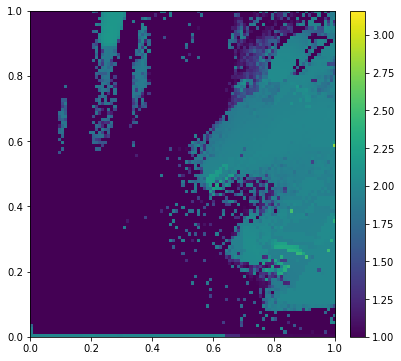

In [71]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(figsize=(6,6))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.2)
#cax = fig.add_axes([.97, .125, .03, .755])
im = ax.imshow(log_TPE,
               origin='lower', extent=[0, 1.0, 0, 1.0], 
                vmax=log_TPE_hebb.max(), vmin=1, aspect='auto')

cbar = fig.colorbar(im, cax)

In [79]:
%matplotlib inline
@widgets.interact(rho=(0, 99, 1), sigma=(0, 99, 1), t_start=(0, 15000, 10), t_end=(0, 15000, 10), 
                  xlim=(0,4000,10), ylim=(0,4000,10), zlim=(0, 4000, 10))
def update(rho=0.0, sigma=0.0, t_start=0, t_end=15000, xlim=50, ylim=50, zlim=50):
    fig = plt.figure(figsize=(15,9))
    ax = fig.add_subplot(111, projection='3d')
    pred = predicted_orbits[(rho_space[rho], sigma_space[sigma])]
    ax.plot(pred[t_start:t_end-1,0], pred[t_start:t_end-1,1], pred[t_start:t_end-1,2], 'b.')
    ax.set_xlim(-xlim, xlim)
    ax.set_ylim(-ylim, ylim)
    ax.set_zlim(0, zlim)
    print("rho = " + str(rho_space[rho]) + " ; sigma = " + str(sigma_space[sigma]))
    print(TPE_matrix[rho, sigma])

interactive(children=(IntSlider(value=0, description='rho', max=99), IntSlider(value=0, description='sigma', m…

In [19]:
RC = ReCom.ESN(N=100, p=0.01, d=3, rho=0.9, sigma=0.014, gamma=10.0, beta=1e-6)

In [20]:
%%time
predicted_orbits_hebb  = resan.rho_sigma_orbits(rho_space, 
                                    sigma_space,
                                    train_data, 
                                    t_points_training, 
                                    t_points_prediction,
                                    5000,
                                    RC,
                                    hebb=True,
                                    eta=0.21,
                                    E=1)

(0.0, 0.0)
(0.01, 0.0)
(0.02, 0.0)
(0.03, 0.0)
(0.04, 0.0)
(0.05, 0.0)
(0.06, 0.0)
(0.07, 0.0)
(0.08, 0.0)
(0.09, 0.0)
(0.1, 0.0)
(0.11, 0.0)
(0.12, 0.0)
(0.13, 0.0)
(0.14, 0.0)
(0.15, 0.0)
(0.16, 0.0)
(0.17, 0.0)
(0.18, 0.0)
(0.19, 0.0)
(0.2, 0.0)
(0.21, 0.0)
(0.22, 0.0)
(0.23, 0.0)
(0.24, 0.0)
(0.25, 0.0)
(0.26, 0.0)
(0.27, 0.0)
(0.28, 0.0)
(0.29, 0.0)
(0.3, 0.0)
(0.31, 0.0)
(0.32, 0.0)
(0.33, 0.0)
(0.34, 0.0)
(0.35000000000000003, 0.0)
(0.36, 0.0)
(0.37, 0.0)
(0.38, 0.0)
(0.39, 0.0)
(0.4, 0.0)
(0.41000000000000003, 0.0)
(0.42, 0.0)
(0.43, 0.0)
(0.44, 0.0)
(0.45, 0.0)
(0.46, 0.0)
(0.47000000000000003, 0.0)
(0.48, 0.0)
(0.49, 0.0)
(0.5, 0.0)
(0.51, 0.0)
(0.52, 0.0)
(0.53, 0.0)
(0.54, 0.0)
(0.55, 0.0)
(0.56, 0.0)
(0.5700000000000001, 0.0)
(0.58, 0.0)
(0.59, 0.0)
(0.6, 0.0)
(0.61, 0.0)
(0.62, 0.0)
(0.63, 0.0)
(0.64, 0.0)
(0.65, 0.0)
(0.66, 0.0)
(0.67, 0.0)
(0.68, 0.0)
(0.6900000000000001, 0.0)
(0.7000000000000001, 0.0)
(0.71, 0.0)
(0.72, 0.0)
(0.73, 0.0)
(0.74, 0.0)
(0.75, 0.0)
(0.76, 0

(0.81, 0.05)
(0.8200000000000001, 0.05)
(0.8300000000000001, 0.05)
(0.84, 0.05)
(0.85, 0.05)
(0.86, 0.05)
(0.87, 0.05)
(0.88, 0.05)
(0.89, 0.05)
(0.9, 0.05)
(0.91, 0.05)
(0.92, 0.05)
(0.93, 0.05)
(0.9400000000000001, 0.05)
(0.9500000000000001, 0.05)
(0.96, 0.05)
(0.97, 0.05)
(0.98, 0.05)
(0.99, 0.05)
(0.0, 0.06)
(0.01, 0.06)
(0.02, 0.06)
(0.03, 0.06)
(0.04, 0.06)
(0.05, 0.06)
(0.06, 0.06)
(0.07, 0.06)
(0.08, 0.06)
(0.09, 0.06)
(0.1, 0.06)
(0.11, 0.06)
(0.12, 0.06)
(0.13, 0.06)
(0.14, 0.06)
(0.15, 0.06)
(0.16, 0.06)
(0.17, 0.06)
(0.18, 0.06)
(0.19, 0.06)
(0.2, 0.06)
(0.21, 0.06)
(0.22, 0.06)
(0.23, 0.06)
(0.24, 0.06)
(0.25, 0.06)
(0.26, 0.06)
(0.27, 0.06)
(0.28, 0.06)
(0.29, 0.06)
(0.3, 0.06)
(0.31, 0.06)
(0.32, 0.06)
(0.33, 0.06)
(0.34, 0.06)
(0.35000000000000003, 0.06)
(0.36, 0.06)
(0.37, 0.06)
(0.38, 0.06)
(0.39, 0.06)
(0.4, 0.06)
(0.41000000000000003, 0.06)
(0.42, 0.06)
(0.43, 0.06)
(0.44, 0.06)
(0.45, 0.06)
(0.46, 0.06)
(0.47000000000000003, 0.06)
(0.48, 0.06)
(0.49, 0.06)
(0.5, 0.

(0.6, 0.11)
(0.61, 0.11)
(0.62, 0.11)
(0.63, 0.11)
(0.64, 0.11)
(0.65, 0.11)
(0.66, 0.11)
(0.67, 0.11)
(0.68, 0.11)
(0.6900000000000001, 0.11)
(0.7000000000000001, 0.11)
(0.71, 0.11)
(0.72, 0.11)
(0.73, 0.11)
(0.74, 0.11)
(0.75, 0.11)
(0.76, 0.11)
(0.77, 0.11)
(0.78, 0.11)
(0.79, 0.11)
(0.8, 0.11)
(0.81, 0.11)
(0.8200000000000001, 0.11)
(0.8300000000000001, 0.11)
(0.84, 0.11)
(0.85, 0.11)
(0.86, 0.11)
(0.87, 0.11)
(0.88, 0.11)
(0.89, 0.11)
(0.9, 0.11)
(0.91, 0.11)
(0.92, 0.11)
(0.93, 0.11)
(0.9400000000000001, 0.11)
(0.9500000000000001, 0.11)
(0.96, 0.11)
(0.97, 0.11)
(0.98, 0.11)
(0.99, 0.11)
(0.0, 0.12)
(0.01, 0.12)
(0.02, 0.12)
(0.03, 0.12)
(0.04, 0.12)
(0.05, 0.12)
(0.06, 0.12)
(0.07, 0.12)
(0.08, 0.12)
(0.09, 0.12)
(0.1, 0.12)
(0.11, 0.12)
(0.12, 0.12)
(0.13, 0.12)
(0.14, 0.12)
(0.15, 0.12)
(0.16, 0.12)
(0.17, 0.12)
(0.18, 0.12)
(0.19, 0.12)
(0.2, 0.12)
(0.21, 0.12)
(0.22, 0.12)
(0.23, 0.12)
(0.24, 0.12)
(0.25, 0.12)
(0.26, 0.12)
(0.27, 0.12)
(0.28, 0.12)
(0.29, 0.12)
(0.3, 0.12)


(0.33, 0.17)
(0.34, 0.17)
(0.35000000000000003, 0.17)
(0.36, 0.17)
(0.37, 0.17)
(0.38, 0.17)
(0.39, 0.17)
(0.4, 0.17)
(0.41000000000000003, 0.17)
(0.42, 0.17)
(0.43, 0.17)
(0.44, 0.17)
(0.45, 0.17)
(0.46, 0.17)
(0.47000000000000003, 0.17)
(0.48, 0.17)
(0.49, 0.17)
(0.5, 0.17)
(0.51, 0.17)
(0.52, 0.17)
(0.53, 0.17)
(0.54, 0.17)
(0.55, 0.17)
(0.56, 0.17)
(0.5700000000000001, 0.17)
(0.58, 0.17)
(0.59, 0.17)
(0.6, 0.17)
(0.61, 0.17)
(0.62, 0.17)
(0.63, 0.17)
(0.64, 0.17)
(0.65, 0.17)
(0.66, 0.17)
(0.67, 0.17)
(0.68, 0.17)
(0.6900000000000001, 0.17)
(0.7000000000000001, 0.17)
(0.71, 0.17)
(0.72, 0.17)
(0.73, 0.17)
(0.74, 0.17)
(0.75, 0.17)
(0.76, 0.17)
(0.77, 0.17)
(0.78, 0.17)
(0.79, 0.17)
(0.8, 0.17)
(0.81, 0.17)
(0.8200000000000001, 0.17)
(0.8300000000000001, 0.17)
(0.84, 0.17)
(0.85, 0.17)
(0.86, 0.17)
(0.87, 0.17)
(0.88, 0.17)
(0.89, 0.17)
(0.9, 0.17)
(0.91, 0.17)
(0.92, 0.17)
(0.93, 0.17)
(0.9400000000000001, 0.17)
(0.9500000000000001, 0.17)
(0.96, 0.17)
(0.97, 0.17)
(0.98, 0.17)
(0.9

(0.09, 0.23)
(0.1, 0.23)
(0.11, 0.23)
(0.12, 0.23)
(0.13, 0.23)
(0.14, 0.23)
(0.15, 0.23)
(0.16, 0.23)
(0.17, 0.23)
(0.18, 0.23)
(0.19, 0.23)
(0.2, 0.23)
(0.21, 0.23)
(0.22, 0.23)
(0.23, 0.23)
(0.24, 0.23)
(0.25, 0.23)
(0.26, 0.23)
(0.27, 0.23)
(0.28, 0.23)
(0.29, 0.23)
(0.3, 0.23)
(0.31, 0.23)
(0.32, 0.23)
(0.33, 0.23)
(0.34, 0.23)
(0.35000000000000003, 0.23)
(0.36, 0.23)
(0.37, 0.23)
(0.38, 0.23)
(0.39, 0.23)
(0.4, 0.23)
(0.41000000000000003, 0.23)
(0.42, 0.23)
(0.43, 0.23)
(0.44, 0.23)
(0.45, 0.23)
(0.46, 0.23)
(0.47000000000000003, 0.23)
(0.48, 0.23)
(0.49, 0.23)
(0.5, 0.23)
(0.51, 0.23)
(0.52, 0.23)
(0.53, 0.23)
(0.54, 0.23)
(0.55, 0.23)
(0.56, 0.23)
(0.5700000000000001, 0.23)
(0.58, 0.23)
(0.59, 0.23)
(0.6, 0.23)
(0.61, 0.23)
(0.62, 0.23)
(0.63, 0.23)
(0.64, 0.23)
(0.65, 0.23)
(0.66, 0.23)
(0.67, 0.23)
(0.68, 0.23)
(0.6900000000000001, 0.23)
(0.7000000000000001, 0.23)
(0.71, 0.23)
(0.72, 0.23)
(0.73, 0.23)
(0.74, 0.23)
(0.75, 0.23)
(0.76, 0.23)
(0.77, 0.23)
(0.78, 0.23)
(0.79, 0.

(0.8200000000000001, 0.28)
(0.8300000000000001, 0.28)
(0.84, 0.28)
(0.85, 0.28)
(0.86, 0.28)
(0.87, 0.28)
(0.88, 0.28)
(0.89, 0.28)
(0.9, 0.28)
(0.91, 0.28)
(0.92, 0.28)
(0.93, 0.28)
(0.9400000000000001, 0.28)
(0.9500000000000001, 0.28)
(0.96, 0.28)
(0.97, 0.28)
(0.98, 0.28)
(0.99, 0.28)
(0.0, 0.29)
(0.01, 0.29)
(0.02, 0.29)
(0.03, 0.29)
(0.04, 0.29)
(0.05, 0.29)
(0.06, 0.29)
(0.07, 0.29)
(0.08, 0.29)
(0.09, 0.29)
(0.1, 0.29)
(0.11, 0.29)
(0.12, 0.29)
(0.13, 0.29)
(0.14, 0.29)
(0.15, 0.29)
(0.16, 0.29)
(0.17, 0.29)
(0.18, 0.29)
(0.19, 0.29)
(0.2, 0.29)
(0.21, 0.29)
(0.22, 0.29)
(0.23, 0.29)
(0.24, 0.29)
(0.25, 0.29)
(0.26, 0.29)
(0.27, 0.29)
(0.28, 0.29)
(0.29, 0.29)
(0.3, 0.29)
(0.31, 0.29)
(0.32, 0.29)
(0.33, 0.29)
(0.34, 0.29)
(0.35000000000000003, 0.29)
(0.36, 0.29)
(0.37, 0.29)
(0.38, 0.29)
(0.39, 0.29)
(0.4, 0.29)
(0.41000000000000003, 0.29)
(0.42, 0.29)
(0.43, 0.29)
(0.44, 0.29)
(0.45, 0.29)
(0.46, 0.29)
(0.47000000000000003, 0.29)
(0.48, 0.29)
(0.49, 0.29)
(0.5, 0.29)
(0.51, 0.

(0.61, 0.34)
(0.62, 0.34)
(0.63, 0.34)
(0.64, 0.34)
(0.65, 0.34)
(0.66, 0.34)
(0.67, 0.34)
(0.68, 0.34)
(0.6900000000000001, 0.34)
(0.7000000000000001, 0.34)
(0.71, 0.34)
(0.72, 0.34)
(0.73, 0.34)
(0.74, 0.34)
(0.75, 0.34)
(0.76, 0.34)
(0.77, 0.34)
(0.78, 0.34)
(0.79, 0.34)
(0.8, 0.34)
(0.81, 0.34)
(0.8200000000000001, 0.34)
(0.8300000000000001, 0.34)
(0.84, 0.34)
(0.85, 0.34)
(0.86, 0.34)
(0.87, 0.34)
(0.88, 0.34)
(0.89, 0.34)
(0.9, 0.34)
(0.91, 0.34)
(0.92, 0.34)
(0.93, 0.34)
(0.9400000000000001, 0.34)
(0.9500000000000001, 0.34)
(0.96, 0.34)
(0.97, 0.34)
(0.98, 0.34)
(0.99, 0.34)
(0.0, 0.35000000000000003)
(0.01, 0.35000000000000003)
(0.02, 0.35000000000000003)
(0.03, 0.35000000000000003)
(0.04, 0.35000000000000003)
(0.05, 0.35000000000000003)
(0.06, 0.35000000000000003)
(0.07, 0.35000000000000003)
(0.08, 0.35000000000000003)
(0.09, 0.35000000000000003)
(0.1, 0.35000000000000003)
(0.11, 0.35000000000000003)
(0.12, 0.35000000000000003)
(0.13, 0.35000000000000003)
(0.14, 0.350000000000

(0.29, 0.39)
(0.3, 0.39)
(0.31, 0.39)
(0.32, 0.39)
(0.33, 0.39)
(0.34, 0.39)
(0.35000000000000003, 0.39)
(0.36, 0.39)
(0.37, 0.39)
(0.38, 0.39)
(0.39, 0.39)
(0.4, 0.39)
(0.41000000000000003, 0.39)
(0.42, 0.39)
(0.43, 0.39)
(0.44, 0.39)
(0.45, 0.39)
(0.46, 0.39)
(0.47000000000000003, 0.39)
(0.48, 0.39)
(0.49, 0.39)
(0.5, 0.39)
(0.51, 0.39)
(0.52, 0.39)
(0.53, 0.39)
(0.54, 0.39)
(0.55, 0.39)
(0.56, 0.39)
(0.5700000000000001, 0.39)
(0.58, 0.39)
(0.59, 0.39)
(0.6, 0.39)
(0.61, 0.39)
(0.62, 0.39)
(0.63, 0.39)
(0.64, 0.39)
(0.65, 0.39)
(0.66, 0.39)
(0.67, 0.39)
(0.68, 0.39)
(0.6900000000000001, 0.39)
(0.7000000000000001, 0.39)
(0.71, 0.39)
(0.72, 0.39)
(0.73, 0.39)
(0.74, 0.39)
(0.75, 0.39)
(0.76, 0.39)
(0.77, 0.39)
(0.78, 0.39)
(0.79, 0.39)
(0.8, 0.39)
(0.81, 0.39)
(0.8200000000000001, 0.39)
(0.8300000000000001, 0.39)
(0.84, 0.39)
(0.85, 0.39)
(0.86, 0.39)
(0.87, 0.39)
(0.88, 0.39)
(0.89, 0.39)
(0.9, 0.39)
(0.91, 0.39)
(0.92, 0.39)
(0.93, 0.39)
(0.9400000000000001, 0.39)
(0.9500000000000001

(0.0, 0.44)
(0.01, 0.44)
(0.02, 0.44)
(0.03, 0.44)
(0.04, 0.44)
(0.05, 0.44)
(0.06, 0.44)
(0.07, 0.44)
(0.08, 0.44)
(0.09, 0.44)
(0.1, 0.44)
(0.11, 0.44)
(0.12, 0.44)
(0.13, 0.44)
(0.14, 0.44)
(0.15, 0.44)
(0.16, 0.44)
(0.17, 0.44)
(0.18, 0.44)
(0.19, 0.44)
(0.2, 0.44)
(0.21, 0.44)
(0.22, 0.44)
(0.23, 0.44)
(0.24, 0.44)
(0.25, 0.44)
(0.26, 0.44)
(0.27, 0.44)
(0.28, 0.44)
(0.29, 0.44)
(0.3, 0.44)
(0.31, 0.44)
(0.32, 0.44)
(0.33, 0.44)
(0.34, 0.44)
(0.35000000000000003, 0.44)
(0.36, 0.44)
(0.37, 0.44)
(0.38, 0.44)
(0.39, 0.44)
(0.4, 0.44)
(0.41000000000000003, 0.44)
(0.42, 0.44)
(0.43, 0.44)
(0.44, 0.44)
(0.45, 0.44)
(0.46, 0.44)
(0.47000000000000003, 0.44)
(0.48, 0.44)
(0.49, 0.44)
(0.5, 0.44)
(0.51, 0.44)
(0.52, 0.44)
(0.53, 0.44)
(0.54, 0.44)
(0.55, 0.44)
(0.56, 0.44)
(0.5700000000000001, 0.44)
(0.58, 0.44)
(0.59, 0.44)
(0.6, 0.44)
(0.61, 0.44)
(0.62, 0.44)
(0.63, 0.44)
(0.64, 0.44)
(0.65, 0.44)
(0.66, 0.44)
(0.67, 0.44)
(0.68, 0.44)
(0.6900000000000001, 0.44)
(0.7000000000000001, 0.4

(0.7000000000000001, 0.48)
(0.71, 0.48)
(0.72, 0.48)
(0.73, 0.48)
(0.74, 0.48)
(0.75, 0.48)
(0.76, 0.48)
(0.77, 0.48)
(0.78, 0.48)
(0.79, 0.48)
(0.8, 0.48)
(0.81, 0.48)
(0.8200000000000001, 0.48)
(0.8300000000000001, 0.48)
(0.84, 0.48)
(0.85, 0.48)
(0.86, 0.48)
(0.87, 0.48)
(0.88, 0.48)
(0.89, 0.48)
(0.9, 0.48)
(0.91, 0.48)
(0.92, 0.48)
(0.93, 0.48)
(0.9400000000000001, 0.48)
(0.9500000000000001, 0.48)
(0.96, 0.48)
(0.97, 0.48)
(0.98, 0.48)
(0.99, 0.48)
(0.0, 0.49)
(0.01, 0.49)
(0.02, 0.49)
(0.03, 0.49)
(0.04, 0.49)
(0.05, 0.49)
(0.06, 0.49)
(0.07, 0.49)
(0.08, 0.49)
(0.09, 0.49)
(0.1, 0.49)
(0.11, 0.49)
(0.12, 0.49)
(0.13, 0.49)
(0.14, 0.49)
(0.15, 0.49)
(0.16, 0.49)
(0.17, 0.49)
(0.18, 0.49)
(0.19, 0.49)
(0.2, 0.49)
(0.21, 0.49)
(0.22, 0.49)
(0.23, 0.49)
(0.24, 0.49)
(0.25, 0.49)
(0.26, 0.49)
(0.27, 0.49)
(0.28, 0.49)
(0.29, 0.49)
(0.3, 0.49)
(0.31, 0.49)
(0.32, 0.49)
(0.33, 0.49)
(0.34, 0.49)
(0.35000000000000003, 0.49)
(0.36, 0.49)
(0.37, 0.49)
(0.38, 0.49)
(0.39, 0.49)
(0.4, 0.49)

(0.49, 0.54)
(0.5, 0.54)
(0.51, 0.54)
(0.52, 0.54)
(0.53, 0.54)
(0.54, 0.54)
(0.55, 0.54)
(0.56, 0.54)
(0.5700000000000001, 0.54)
(0.58, 0.54)
(0.59, 0.54)
(0.6, 0.54)
(0.61, 0.54)
(0.62, 0.54)
(0.63, 0.54)
(0.64, 0.54)
(0.65, 0.54)
(0.66, 0.54)
(0.67, 0.54)
(0.68, 0.54)
(0.6900000000000001, 0.54)
(0.7000000000000001, 0.54)
(0.71, 0.54)
(0.72, 0.54)
(0.73, 0.54)
(0.74, 0.54)
(0.75, 0.54)
(0.76, 0.54)
(0.77, 0.54)
(0.78, 0.54)
(0.79, 0.54)
(0.8, 0.54)
(0.81, 0.54)
(0.8200000000000001, 0.54)
(0.8300000000000001, 0.54)
(0.84, 0.54)
(0.85, 0.54)
(0.86, 0.54)
(0.87, 0.54)
(0.88, 0.54)
(0.89, 0.54)
(0.9, 0.54)
(0.91, 0.54)
(0.92, 0.54)
(0.93, 0.54)
(0.9400000000000001, 0.54)
(0.9500000000000001, 0.54)
(0.96, 0.54)
(0.97, 0.54)
(0.98, 0.54)
(0.99, 0.54)
(0.0, 0.55)
(0.01, 0.55)
(0.02, 0.55)
(0.03, 0.55)
(0.04, 0.55)
(0.05, 0.55)
(0.06, 0.55)
(0.07, 0.55)
(0.08, 0.55)
(0.09, 0.55)
(0.1, 0.55)
(0.11, 0.55)
(0.12, 0.55)
(0.13, 0.55)
(0.14, 0.55)
(0.15, 0.55)
(0.16, 0.55)
(0.17, 0.55)
(0.18, 0.55

(0.24, 0.59)
(0.25, 0.59)
(0.26, 0.59)
(0.27, 0.59)
(0.28, 0.59)
(0.29, 0.59)
(0.3, 0.59)
(0.31, 0.59)
(0.32, 0.59)
(0.33, 0.59)
(0.34, 0.59)
(0.35000000000000003, 0.59)
(0.36, 0.59)
(0.37, 0.59)
(0.38, 0.59)
(0.39, 0.59)
(0.4, 0.59)
(0.41000000000000003, 0.59)
(0.42, 0.59)
(0.43, 0.59)
(0.44, 0.59)
(0.45, 0.59)
(0.46, 0.59)
(0.47000000000000003, 0.59)
(0.48, 0.59)
(0.49, 0.59)
(0.5, 0.59)
(0.51, 0.59)
(0.52, 0.59)
(0.53, 0.59)
(0.54, 0.59)
(0.55, 0.59)
(0.56, 0.59)
(0.5700000000000001, 0.59)
(0.58, 0.59)
(0.59, 0.59)
(0.6, 0.59)
(0.61, 0.59)
(0.62, 0.59)
(0.63, 0.59)
(0.64, 0.59)
(0.65, 0.59)
(0.66, 0.59)
(0.67, 0.59)
(0.68, 0.59)
(0.6900000000000001, 0.59)
(0.7000000000000001, 0.59)
(0.71, 0.59)
(0.72, 0.59)
(0.73, 0.59)
(0.74, 0.59)
(0.75, 0.59)
(0.76, 0.59)
(0.77, 0.59)
(0.78, 0.59)
(0.79, 0.59)
(0.8, 0.59)
(0.81, 0.59)
(0.8200000000000001, 0.59)
(0.8300000000000001, 0.59)
(0.84, 0.59)
(0.85, 0.59)
(0.86, 0.59)
(0.87, 0.59)
(0.88, 0.59)
(0.89, 0.59)
(0.9, 0.59)
(0.91, 0.59)
(0.92, 

(0.0, 0.65)
(0.01, 0.65)
(0.02, 0.65)
(0.03, 0.65)
(0.04, 0.65)
(0.05, 0.65)
(0.06, 0.65)
(0.07, 0.65)
(0.08, 0.65)
(0.09, 0.65)
(0.1, 0.65)
(0.11, 0.65)
(0.12, 0.65)
(0.13, 0.65)
(0.14, 0.65)
(0.15, 0.65)
(0.16, 0.65)
(0.17, 0.65)
(0.18, 0.65)
(0.19, 0.65)
(0.2, 0.65)
(0.21, 0.65)
(0.22, 0.65)
(0.23, 0.65)
(0.24, 0.65)
(0.25, 0.65)
(0.26, 0.65)
(0.27, 0.65)
(0.28, 0.65)
(0.29, 0.65)
(0.3, 0.65)
(0.31, 0.65)
(0.32, 0.65)
(0.33, 0.65)
(0.34, 0.65)
(0.35000000000000003, 0.65)
(0.36, 0.65)
(0.37, 0.65)
(0.38, 0.65)
(0.39, 0.65)
(0.4, 0.65)
(0.41000000000000003, 0.65)
(0.42, 0.65)
(0.43, 0.65)
(0.44, 0.65)
(0.45, 0.65)
(0.46, 0.65)
(0.47000000000000003, 0.65)
(0.48, 0.65)
(0.49, 0.65)
(0.5, 0.65)
(0.51, 0.65)
(0.52, 0.65)
(0.53, 0.65)
(0.54, 0.65)
(0.55, 0.65)
(0.56, 0.65)
(0.5700000000000001, 0.65)
(0.58, 0.65)
(0.59, 0.65)
(0.6, 0.65)
(0.61, 0.65)
(0.62, 0.65)
(0.63, 0.65)
(0.64, 0.65)
(0.65, 0.65)
(0.66, 0.65)
(0.67, 0.65)
(0.68, 0.65)
(0.6900000000000001, 0.65)
(0.7000000000000001, 0.6

(0.88, 0.6900000000000001)
(0.89, 0.6900000000000001)
(0.9, 0.6900000000000001)
(0.91, 0.6900000000000001)
(0.92, 0.6900000000000001)
(0.93, 0.6900000000000001)
(0.9400000000000001, 0.6900000000000001)
(0.9500000000000001, 0.6900000000000001)
(0.96, 0.6900000000000001)
(0.97, 0.6900000000000001)
(0.98, 0.6900000000000001)
(0.99, 0.6900000000000001)
(0.0, 0.7000000000000001)
(0.01, 0.7000000000000001)
(0.02, 0.7000000000000001)
(0.03, 0.7000000000000001)
(0.04, 0.7000000000000001)
(0.05, 0.7000000000000001)
(0.06, 0.7000000000000001)
(0.07, 0.7000000000000001)
(0.08, 0.7000000000000001)
(0.09, 0.7000000000000001)
(0.1, 0.7000000000000001)
(0.11, 0.7000000000000001)
(0.12, 0.7000000000000001)
(0.13, 0.7000000000000001)
(0.14, 0.7000000000000001)
(0.15, 0.7000000000000001)
(0.16, 0.7000000000000001)
(0.17, 0.7000000000000001)
(0.18, 0.7000000000000001)
(0.19, 0.7000000000000001)
(0.2, 0.7000000000000001)
(0.21, 0.7000000000000001)
(0.22, 0.7000000000000001)
(0.23, 0.7000000000000001)
(0.2

(0.52, 0.74)
(0.53, 0.74)
(0.54, 0.74)
(0.55, 0.74)
(0.56, 0.74)
(0.5700000000000001, 0.74)
(0.58, 0.74)
(0.59, 0.74)
(0.6, 0.74)
(0.61, 0.74)
(0.62, 0.74)
(0.63, 0.74)
(0.64, 0.74)
(0.65, 0.74)
(0.66, 0.74)
(0.67, 0.74)
(0.68, 0.74)
(0.6900000000000001, 0.74)
(0.7000000000000001, 0.74)
(0.71, 0.74)
(0.72, 0.74)
(0.73, 0.74)
(0.74, 0.74)
(0.75, 0.74)
(0.76, 0.74)
(0.77, 0.74)
(0.78, 0.74)
(0.79, 0.74)
(0.8, 0.74)
(0.81, 0.74)
(0.8200000000000001, 0.74)
(0.8300000000000001, 0.74)
(0.84, 0.74)
(0.85, 0.74)
(0.86, 0.74)
(0.87, 0.74)
(0.88, 0.74)
(0.89, 0.74)
(0.9, 0.74)
(0.91, 0.74)
(0.92, 0.74)
(0.93, 0.74)
(0.9400000000000001, 0.74)
(0.9500000000000001, 0.74)
(0.96, 0.74)
(0.97, 0.74)
(0.98, 0.74)
(0.99, 0.74)
(0.0, 0.75)
(0.01, 0.75)
(0.02, 0.75)
(0.03, 0.75)
(0.04, 0.75)
(0.05, 0.75)
(0.06, 0.75)
(0.07, 0.75)
(0.08, 0.75)
(0.09, 0.75)
(0.1, 0.75)
(0.11, 0.75)
(0.12, 0.75)
(0.13, 0.75)
(0.14, 0.75)
(0.15, 0.75)
(0.16, 0.75)
(0.17, 0.75)
(0.18, 0.75)
(0.19, 0.75)
(0.2, 0.75)
(0.21, 0.75

(0.26, 0.8)
(0.27, 0.8)
(0.28, 0.8)
(0.29, 0.8)
(0.3, 0.8)
(0.31, 0.8)
(0.32, 0.8)
(0.33, 0.8)
(0.34, 0.8)
(0.35000000000000003, 0.8)
(0.36, 0.8)
(0.37, 0.8)
(0.38, 0.8)
(0.39, 0.8)
(0.4, 0.8)
(0.41000000000000003, 0.8)
(0.42, 0.8)
(0.43, 0.8)
(0.44, 0.8)
(0.45, 0.8)
(0.46, 0.8)
(0.47000000000000003, 0.8)
(0.48, 0.8)
(0.49, 0.8)
(0.5, 0.8)
(0.51, 0.8)
(0.52, 0.8)
(0.53, 0.8)
(0.54, 0.8)
(0.55, 0.8)
(0.56, 0.8)
(0.5700000000000001, 0.8)
(0.58, 0.8)
(0.59, 0.8)
(0.6, 0.8)
(0.61, 0.8)
(0.62, 0.8)
(0.63, 0.8)
(0.64, 0.8)
(0.65, 0.8)
(0.66, 0.8)
(0.67, 0.8)
(0.68, 0.8)
(0.6900000000000001, 0.8)
(0.7000000000000001, 0.8)
(0.71, 0.8)
(0.72, 0.8)
(0.73, 0.8)
(0.74, 0.8)
(0.75, 0.8)
(0.76, 0.8)
(0.77, 0.8)
(0.78, 0.8)
(0.79, 0.8)
(0.8, 0.8)
(0.81, 0.8)
(0.8200000000000001, 0.8)
(0.8300000000000001, 0.8)
(0.84, 0.8)
(0.85, 0.8)
(0.86, 0.8)
(0.87, 0.8)
(0.88, 0.8)
(0.89, 0.8)
(0.9, 0.8)
(0.91, 0.8)
(0.92, 0.8)
(0.93, 0.8)
(0.9400000000000001, 0.8)
(0.9500000000000001, 0.8)
(0.96, 0.8)
(0.97, 0.8)

(0.06, 0.84)
(0.07, 0.84)
(0.08, 0.84)
(0.09, 0.84)
(0.1, 0.84)
(0.11, 0.84)
(0.12, 0.84)
(0.13, 0.84)
(0.14, 0.84)
(0.15, 0.84)
(0.16, 0.84)
(0.17, 0.84)
(0.18, 0.84)
(0.19, 0.84)
(0.2, 0.84)
(0.21, 0.84)
(0.22, 0.84)
(0.23, 0.84)
(0.24, 0.84)
(0.25, 0.84)
(0.26, 0.84)
(0.27, 0.84)
(0.28, 0.84)
(0.29, 0.84)
(0.3, 0.84)
(0.31, 0.84)
(0.32, 0.84)
(0.33, 0.84)
(0.34, 0.84)
(0.35000000000000003, 0.84)
(0.36, 0.84)
(0.37, 0.84)
(0.38, 0.84)
(0.39, 0.84)
(0.4, 0.84)
(0.41000000000000003, 0.84)
(0.42, 0.84)
(0.43, 0.84)
(0.44, 0.84)
(0.45, 0.84)
(0.46, 0.84)
(0.47000000000000003, 0.84)
(0.48, 0.84)
(0.49, 0.84)
(0.5, 0.84)
(0.51, 0.84)
(0.52, 0.84)
(0.53, 0.84)
(0.54, 0.84)
(0.55, 0.84)
(0.56, 0.84)
(0.5700000000000001, 0.84)
(0.58, 0.84)
(0.59, 0.84)
(0.6, 0.84)
(0.61, 0.84)
(0.62, 0.84)
(0.63, 0.84)
(0.64, 0.84)
(0.65, 0.84)
(0.66, 0.84)
(0.67, 0.84)
(0.68, 0.84)
(0.6900000000000001, 0.84)
(0.7000000000000001, 0.84)
(0.71, 0.84)
(0.72, 0.84)
(0.73, 0.84)
(0.74, 0.84)
(0.75, 0.84)
(0.76, 0.

(0.79, 0.89)
(0.8, 0.89)
(0.81, 0.89)
(0.8200000000000001, 0.89)
(0.8300000000000001, 0.89)
(0.84, 0.89)
(0.85, 0.89)
(0.86, 0.89)
(0.87, 0.89)
(0.88, 0.89)
(0.89, 0.89)
(0.9, 0.89)
(0.91, 0.89)
(0.92, 0.89)
(0.93, 0.89)
(0.9400000000000001, 0.89)
(0.9500000000000001, 0.89)
(0.96, 0.89)
(0.97, 0.89)
(0.98, 0.89)
(0.99, 0.89)
(0.0, 0.9)
(0.01, 0.9)
(0.02, 0.9)
(0.03, 0.9)
(0.04, 0.9)
(0.05, 0.9)
(0.06, 0.9)
(0.07, 0.9)
(0.08, 0.9)
(0.09, 0.9)
(0.1, 0.9)
(0.11, 0.9)
(0.12, 0.9)
(0.13, 0.9)
(0.14, 0.9)
(0.15, 0.9)
(0.16, 0.9)
(0.17, 0.9)
(0.18, 0.9)
(0.19, 0.9)
(0.2, 0.9)
(0.21, 0.9)
(0.22, 0.9)
(0.23, 0.9)
(0.24, 0.9)
(0.25, 0.9)
(0.26, 0.9)
(0.27, 0.9)
(0.28, 0.9)
(0.29, 0.9)
(0.3, 0.9)
(0.31, 0.9)
(0.32, 0.9)
(0.33, 0.9)
(0.34, 0.9)
(0.35000000000000003, 0.9)
(0.36, 0.9)
(0.37, 0.9)
(0.38, 0.9)
(0.39, 0.9)
(0.4, 0.9)
(0.41000000000000003, 0.9)
(0.42, 0.9)
(0.43, 0.9)
(0.44, 0.9)
(0.45, 0.9)
(0.46, 0.9)
(0.47000000000000003, 0.9)
(0.48, 0.9)
(0.49, 0.9)
(0.5, 0.9)
(0.51, 0.9)
(0.52, 0.9

(0.8, 0.9400000000000001)
(0.81, 0.9400000000000001)
(0.8200000000000001, 0.9400000000000001)
(0.8300000000000001, 0.9400000000000001)
(0.84, 0.9400000000000001)
(0.85, 0.9400000000000001)
(0.86, 0.9400000000000001)
(0.87, 0.9400000000000001)
(0.88, 0.9400000000000001)
(0.89, 0.9400000000000001)
(0.9, 0.9400000000000001)
(0.91, 0.9400000000000001)
(0.92, 0.9400000000000001)
(0.93, 0.9400000000000001)
(0.9400000000000001, 0.9400000000000001)
(0.9500000000000001, 0.9400000000000001)
(0.96, 0.9400000000000001)
(0.97, 0.9400000000000001)
(0.98, 0.9400000000000001)
(0.99, 0.9400000000000001)
(0.0, 0.9500000000000001)
(0.01, 0.9500000000000001)
(0.02, 0.9500000000000001)
(0.03, 0.9500000000000001)
(0.04, 0.9500000000000001)
(0.05, 0.9500000000000001)
(0.06, 0.9500000000000001)
(0.07, 0.9500000000000001)
(0.08, 0.9500000000000001)
(0.09, 0.9500000000000001)
(0.1, 0.9500000000000001)
(0.11, 0.9500000000000001)
(0.12, 0.9500000000000001)
(0.13, 0.9500000000000001)
(0.14, 0.9500000000000001)
(0.

(0.36, 0.99)
(0.37, 0.99)
(0.38, 0.99)
(0.39, 0.99)
(0.4, 0.99)
(0.41000000000000003, 0.99)
(0.42, 0.99)
(0.43, 0.99)
(0.44, 0.99)
(0.45, 0.99)
(0.46, 0.99)
(0.47000000000000003, 0.99)
(0.48, 0.99)
(0.49, 0.99)
(0.5, 0.99)
(0.51, 0.99)
(0.52, 0.99)
(0.53, 0.99)
(0.54, 0.99)
(0.55, 0.99)
(0.56, 0.99)
(0.5700000000000001, 0.99)
(0.58, 0.99)
(0.59, 0.99)
(0.6, 0.99)
(0.61, 0.99)
(0.62, 0.99)
(0.63, 0.99)
(0.64, 0.99)
(0.65, 0.99)
(0.66, 0.99)
(0.67, 0.99)
(0.68, 0.99)
(0.6900000000000001, 0.99)
(0.7000000000000001, 0.99)
(0.71, 0.99)
(0.72, 0.99)
(0.73, 0.99)
(0.74, 0.99)
(0.75, 0.99)
(0.76, 0.99)
(0.77, 0.99)
(0.78, 0.99)
(0.79, 0.99)
(0.8, 0.99)
(0.81, 0.99)
(0.8200000000000001, 0.99)
(0.8300000000000001, 0.99)
(0.84, 0.99)
(0.85, 0.99)
(0.86, 0.99)
(0.87, 0.99)
(0.88, 0.99)
(0.89, 0.99)
(0.9, 0.99)
(0.91, 0.99)
(0.92, 0.99)
(0.93, 0.99)
(0.9400000000000001, 0.99)
(0.9500000000000001, 0.99)
(0.96, 0.99)
(0.97, 0.99)
(0.98, 0.99)
(0.99, 0.99)
Wall time: 21h 8min 10s


In [21]:
%store predicted_orbits_hebb

Stored 'predicted_orbits_hebb' (dict)


In [23]:
%%time
TPE_matrix_hebb = resan.TPE_mat(rho_space, sigma_space, predicted_orbits_hebb, dt, lorenz, alpha)

Wall time: 42min 45s


In [24]:
%store TPE_matrix_hebb 

Stored 'TPE_matrix_hebb' (ndarray)


In [7]:
%store -r TPE_matrix_hebb 

In [8]:
log_TPE_hebb = np.log10(TPE_matrix_hebb[:,1:])

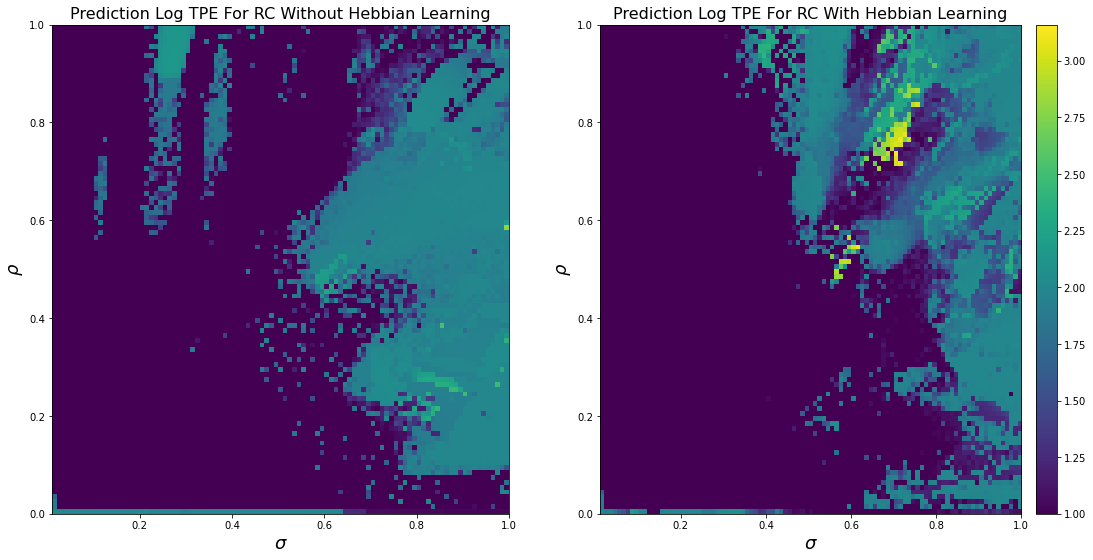

In [40]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,9))
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size = '5%', pad = 0.2)
im1 = ax1.imshow(log_TPE,
               origin='lower', extent=[0.01, 1.0, 0, 1.0], 
                vmax=log_TPE_hebb.max(), vmin=1, aspect='auto')
ax1.set_title('Prediction Log TPE For RC Without Hebbian Learning', fontsize=16)
ax1.set_xlabel('$\sigma$', fontsize=18)
ax1.set_ylabel('$\\rho$', fontsize=18)

im2 = ax2.imshow(log_TPE_hebb,
               origin='lower', extent=[0.01, 1.0, 0, 1.0], 
                vmax=log_TPE_hebb.max(), vmin=1, aspect='auto', interpolation=None)
ax2.set_title('Prediction Log TPE For RC With Hebbian Learning', fontsize=16)
ax2.set_xlabel('$\sigma$', fontsize=18)
ax2.set_ylabel('$\\rho$', fontsize=18)

cbar = fig.colorbar(im2, cax)